In [6]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [7]:
df = pd.read_csv("../data/ChungCheonDC/CompositeETCdata.csv")
df_DC = pd.read_csv("../data/ChungCheonDC/CompositeDCdata.csv")
df_DCstd = pd.read_csv("../data/ChungCheonDC/CompositeDCstddata.csv")

In [8]:
sys.path.append("../codes/")
from DCdata import readReservoirDC_all
directory = "../data/ChungCheonDC/"
dat_temp,height_temp, ID = readReservoirDC_all(directory+"20151231180000.apr")

In [9]:
# missininds = np.arange(df_DC[electrodeID[elecind]].values.size)[np.isnan(df_DC[electrodeID[elecind]].values)]
electrodeID = df_DC.keys()[1:-1]

In [ ]:
out = hist(df_DC.median().values, bins=100)

In [48]:
df_DC.median().values?

Object `values` not found.


In [169]:
istrt_march = 59
iend_march = 89
istrt_april = iend_march + 1
iend_april = istrt_april + 30
istrt_may = iend_april 
iend_may = istrt_may + 31


# print df_DC['date'][istrt_april:iend_april]

In [170]:
print df_DC['date'][istrt_may:iend_may]

120    2015-05-01
121    2015-05-02
122    2015-05-03
123    2015-05-04
124    2015-05-05
125    2015-05-06
126    2015-05-07
127    2015-05-08
128    2015-05-09
129    2015-05-10
130    2015-05-11
131    2015-05-12
132    2015-05-13
133    2015-05-14
134    2015-05-15
135    2015-05-16
136    2015-05-17
137    2015-05-18
138    2015-05-19
139    2015-05-20
140    2015-05-21
141    2015-05-22
142    2015-05-23
143    2015-05-24
144    2015-05-25
145    2015-05-26
146    2015-05-27
147    2015-05-28
148    2015-05-29
149    2015-05-30
150    2015-05-31
Name: date, dtype: object


In [171]:
def getMedian(istart, iend, df_DC):
    return df_DC.ix[istart:iend].median().values

In [172]:
year_medDC = getMedian(0, 364, df_DC)
march_medDC = getMedian(istrt_march, iend_march, df_DC)
april_medDC = getMedian(istrt_april, iend_april, df_DC)
may_medDC = getMedian(istrt_may, iend_may, df_DC)
may1_medDC = getMedian(iend_may, iend_may, df_DC)
may2_medDC = getMedian(iend_may+1, iend_may+1, df_DC)
mayweek1_medDC = getMedian(iend_may-15, iend_may-7, df_DC)
mayweek2_medDC = getMedian(iend_may-7, iend_may, df_DC)

In [173]:
print df_DC['date'][iend_may-13]
print df_DC['date'][iend_may-7]
print df_DC['date'][iend_may-6]
print df_DC['date'][iend_may]

2015-05-19
2015-05-25
2015-05-26
2015-06-01


In [184]:
import matplotlib
matplotlib.rcParams["font.size"] = 14

In [206]:
!mkdir images

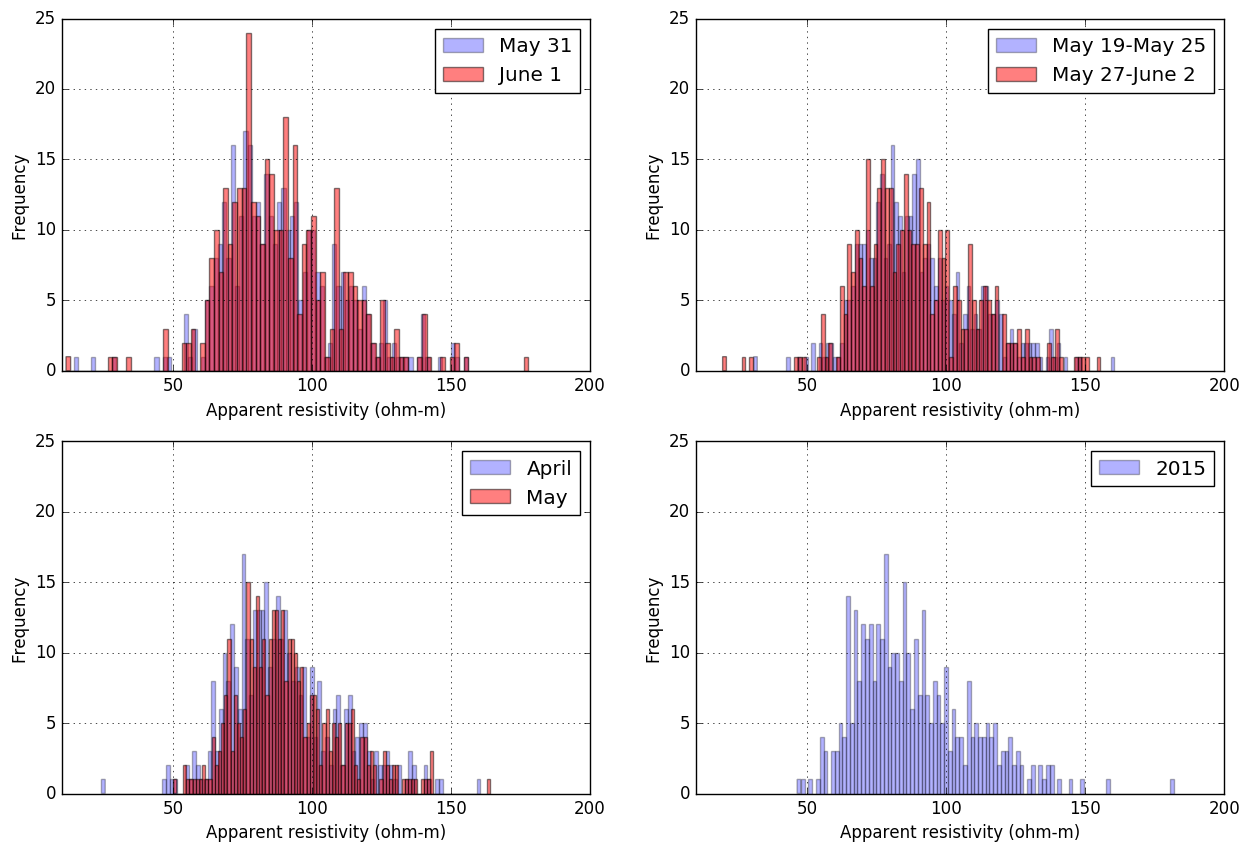

In [207]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
out = ax[0,0].hist(may1_medDC, bins=100, color='b', alpha=0.3)
out = ax[0,0].hist(may2_medDC, bins=100, color='r', alpha=0.5)
ax[0,0].legend(("May 31", "June 1"))
out = ax[0,1].hist(mayweek1_medDC, bins=100, color='b', alpha=0.3)
out = ax[0,1].hist(mayweek2_medDC, bins=100, color='r', alpha=0.5)
ax[0,1].legend(("May 19-May 25", "May 27-June 2"))
out = ax[1,0].hist(may_medDC, bins=100, color='b', alpha=0.3)
out = ax[1,0].hist(april_medDC, bins=100, color='r', alpha=0.5)
ax[1,0].legend(("April", "May"))
out =ax[1,1].hist(year_medDC, bins=100, alpha=0.3)
ax[1,1].legend(("2015", ))

for ax_temp in ax.flatten():
    ax_temp.set_xlim(10,200)
    ax_temp.set_ylim(0,25)
    ax_temp.set_xscale("linear")
    ax_temp.set_xlabel("Apparent resistivity (ohm-m)")    
    ax_temp.set_ylabel("Frequency")    
    ax_temp.grid(True)
fig.savefig("images/Cheongcheonhistogram", dpi=200)

In [199]:
import matplotlib
matplotlib.rcParams["font.size"] = 12

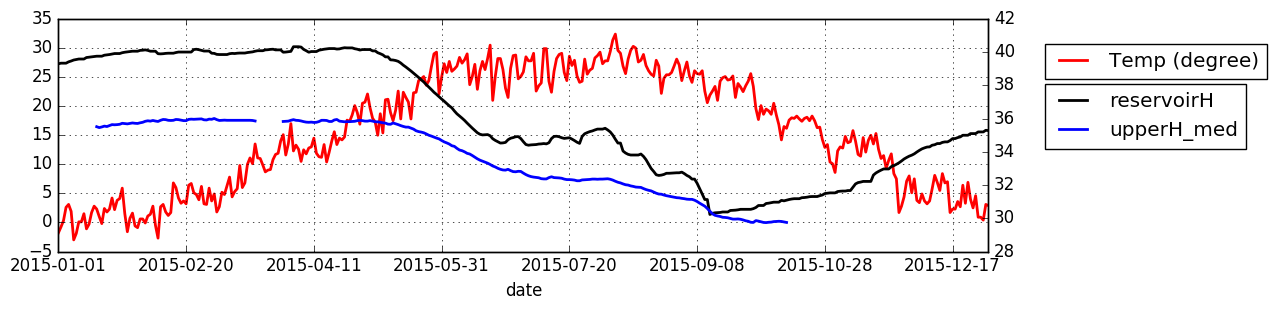

In [202]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1_1, color='b', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1, color='r', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
# itime_ref0 = 255
# itime_ref1 = 115
# ax1.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 35], 'k-')
# ax1.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 35], 'k-')
# print df['date'].values[itime_ref0]
ax1.grid(True)